`***Graded Mini Project Week 31***`

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Tasks

### Part 1: Data Preprocessing

#### 1.Load Data:

In [ ]:
df = pd.read_csv("/content/twitter_training.csv", header = None)

In [ ]:
df.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
df.rename(columns={0: 'tweet ID', 1: 'entity', 2: 'sentiment', 3: 'tweet'}, inplace=True)
df.head()


,tweet ID,entity,sentiment,tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


#### 2.Data Cleaning:

Check for and handle missing values in the dataset

In [ ]:
display(df.isnull().sum())

df.fillna('', inplace=True)

,0
tweet ID,0
entity,0
sentiment,0
tweet,686


Remove Duplicates

In [ ]:
display(f"Shape of dataframe before removing duplicates: {df.shape}")
df.drop_duplicates(inplace=True)
display(f"Shape of dataframe after removing duplicates: {df.shape}")

'Shape of dataframe before removing duplicates: (74682, 4)'

'Shape of dataframe after removing duplicates: (71982, 4)'

Text Cleaning:
Remove URLs, mentions, hashtags, and special characters from the tweet text.

In [ ]:
import re

def clean_text(text):
    text = str(text) # Ensure text is a string
    text = re.sub(r'http\S+', '', text) # Remove URLs
    text = re.sub(r'@\w+', '', text)    # Remove mentions
    text = re.sub(r'#\w+', '', text)    # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text) # Remove special characters
    return text.split() # Split the cleaned text into a list of words

df['tweet'] = df['tweet'].apply(clean_text)
display(df.head())

,tweet ID,entity,sentiment,tweet
0,2401,Borderlands,Positive,"[im, getting, on, borderlands, and, i, will, m..."
1,2401,Borderlands,Positive,"[I, am, coming, to, the, borders, and, I, will..."
2,2401,Borderlands,Positive,"[im, getting, on, borderlands, and, i, will, k..."
3,2401,Borderlands,Positive,"[im, coming, on, borderlands, and, i, will, mu..."
4,2401,Borderlands,Positive,"[im, getting, on, borderlands, 2, and, i, will..."


Tokenise the text and convert words to lowercase

In [ ]:
df['tweet'] = df['tweet'].apply(lambda x: [word.lower() for word in x])
display(df.head())

,tweet ID,entity,sentiment,tweet
0,2401,Borderlands,Positive,"[im, getting, on, borderlands, and, i, will, m..."
1,2401,Borderlands,Positive,"[i, am, coming, to, the, borders, and, i, will..."
2,2401,Borderlands,Positive,"[im, getting, on, borderlands, and, i, will, k..."
3,2401,Borderlands,Positive,"[im, coming, on, borderlands, and, i, will, mu..."
4,2401,Borderlands,Positive,"[im, getting, on, borderlands, 2, and, i, will..."


Remove stop words and apply stemming or lemmatisation

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def process_text(text):
    # Remove stop words
    text = [word for word in text if word not in stop_words]
    # Apply lemmatization
    text = [lemmatizer.lemmatize(word) for word in text]
    return text

df['tweet'] = df['tweet'].apply(process_text)
display(df.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,tweet ID,entity,sentiment,tweet
0,2401,Borderlands,Positive,"[im, getting, borderland, murder]"
1,2401,Borderlands,Positive,"[coming, border, kill]"
2,2401,Borderlands,Positive,"[im, getting, borderland, kill]"
3,2401,Borderlands,Positive,"[im, coming, borderland, murder]"
4,2401,Borderlands,Positive,"[im, getting, borderland, 2, murder]"


#### 3.Feature Engineering:

Convert the text data into numerical format

In [ ]:
%pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 88.2 MB/s eta 0:00:00


In [ ]:
display(df['tweet'].head())

,tweet
0,"[im, getting, borderland, murder]"
1,"[coming, border, kill]"
2,"[im, getting, borderland, kill]"
3,"[im, coming, borderland, murder]"
4,"[im, getting, borderland, 2, murder]"


In [ ]:
from gensim.models import Word2Vec

glove_model = Word2Vec(sentences=df['tweet'], vector_size=100, window=10, min_count=2, workers=4, sg=1)
glove_model.train(df['tweet'], total_examples=len(df['tweet']), epochs=10)

(7557303, 7943360)

In [ ]:
def get_tweet_embedding_glove(text_list):
    embeddings = []
    for word in text_list:
        if word in glove_model.wv:
            embeddings.append(glove_model.wv[word])
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(glove_model.vector_size)

df['tweet_embedding_glove'] = df['tweet'].apply(get_tweet_embedding_glove)
display(df.head())

,tweet ID,entity,sentiment,tweet,tweet_embedding_glove
0,2401,Borderlands,Positive,"[im, getting, borderland, murder]","[0.16927469, 0.24982949, 0.34554762, 0.1913001..."
1,2401,Borderlands,Positive,"[coming, border, kill]","[0.65484315, 0.32559323, -0.20711596, -0.07422..."
2,2401,Borderlands,Positive,"[im, getting, borderland, kill]","[0.45786, 0.2879029, 0.13742214, -0.014735721,..."
3,2401,Borderlands,Positive,"[im, coming, borderland, murder]","[0.30408442, 0.22106402, 0.27807063, 0.1213805..."
4,2401,Borderlands,Positive,"[im, getting, borderland, 2, murder]","[0.20655127, 0.29645306, 0.2719049, 0.16623378..."


### Part 2: Exploratory Data Analysis (EDA)

#### 1.Basic Statistics:

Summarise the dataset (mean, median, mode, etc.).

In [ ]:
display("Summary Statistics for Numerical Columns:")
display(df.describe())

display("Value Counts and Mode for Categorical Columns:")
for col in ['entity', 'sentiment']:
    display(f"Column: {col}")
    display(df[col].value_counts())
    display(f"Mode: {df[col].mode()[0]}")

display(" Missing Values:")
display(df.isnull().sum())

display(" DataFrame Info:")
display(df.info())

display(" DataFrame Shape:")
display(df.shape)

'Summary Statistics for Numerical Columns:'

,tweet ID
count,71982.000000
mean,6437.396307
std,3743.198550
min,1.000000
25%,3199.000000
50%,6434.000000
75%,9607.000000
max,13200.000000


'Value Counts and Mode for Categorical Columns:'

'Column: entity'

,count
entity,
TomClancysRainbowSix,2344
Verizon,2328
MaddenNFL,2324
CallOfDuty,2322
Microsoft,2319
NBA2K,2306
WorldOfCraft,2304
LeagueOfLegends,2303
TomClancysGhostRecon,2301


'Mode: TomClancysRainbowSix'

'Column: sentiment'

,count
sentiment,
Negative,21787
Positive,19811
Neutral,17800
Irrelevant,12584


'Mode: Negative'

' Missing Values:'

,0
tweet ID,0
entity,0
sentiment,0
tweet,0
tweet_embedding_glove,0


' DataFrame Info:'

<class 'pandas.core.frame.DataFrame'>
Index: 71982 entries, 0 to 74681
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   tweet ID               71982 non-null  int64 
 1   entity                 71982 non-null  object
 2   sentiment              71982 non-null  object
 3   tweet                  71982 non-null  object
 4   tweet_embedding_glove  71982 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.3+ MB


None

' DataFrame Shape:'

(71982, 5)

Explore the distribution of tweet sentiments (e.g., how many positive, negative, and neutral tweets are there?).

In [ ]:
df['sentiment'].value_counts()
df['sentiment'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'


,proportion
sentiment,
Negative,30.27%
Positive,27.52%
Neutral,24.73%
Irrelevant,17.48%


#### 2.Visualization

Create visualisations to showcase:

The distribution of sentiments.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

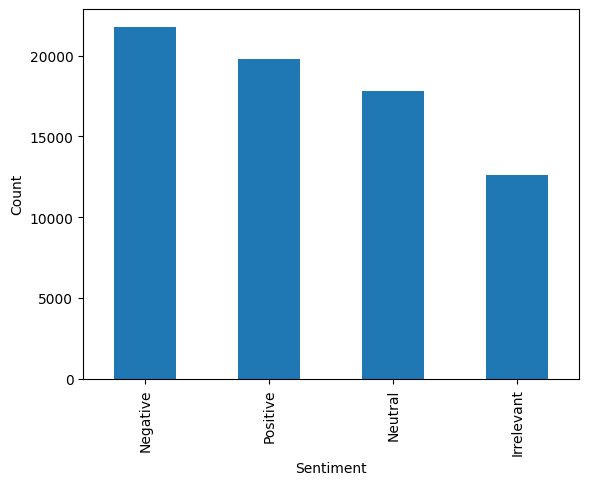

In [ ]:
df['sentiment'].value_counts().plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt

The frequency of top words in positive, negative, and neutral sentiments.

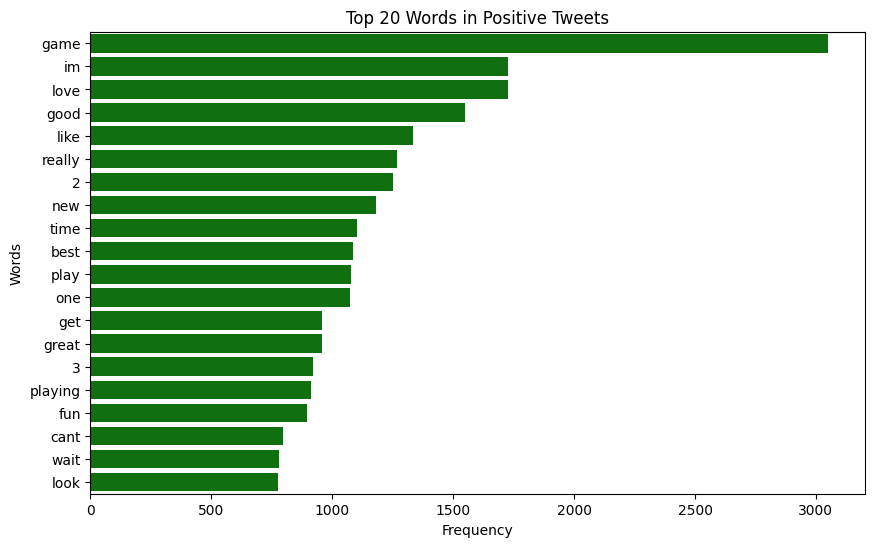

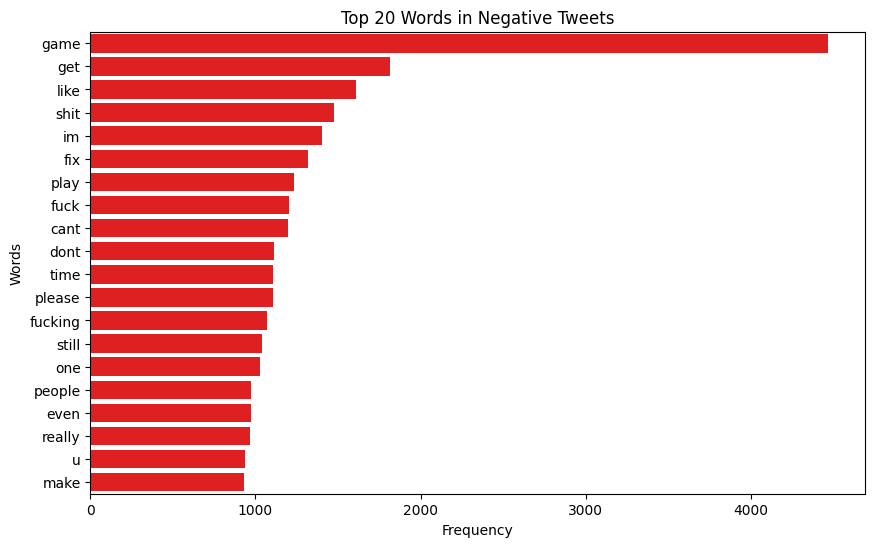

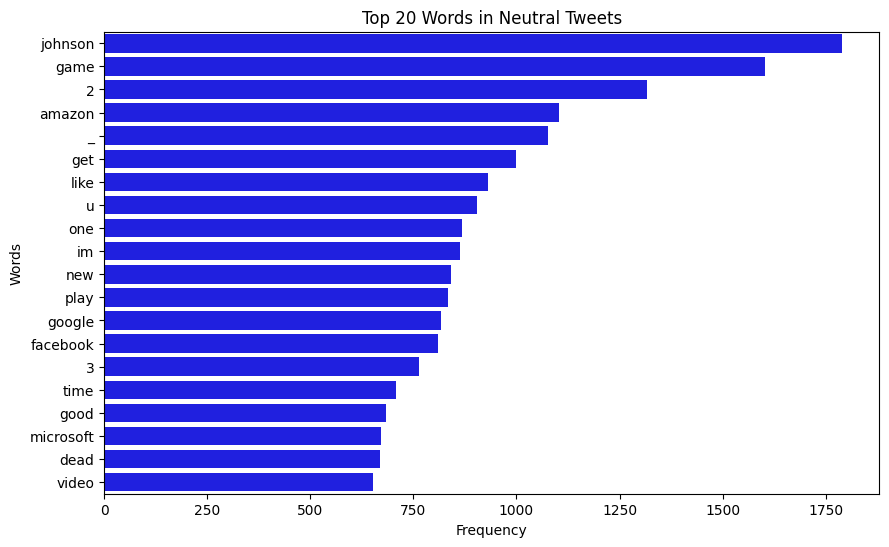

In [ ]:
from collections import Counter

def plot_top_words(sentiment, color):
    tweets_by_sentiment = df[df['sentiment'] == sentiment]['tweet']
    all_words = [word for tweet in tweets_by_sentiment for word in tweet]
    word_counts = Counter(all_words)
    top_words = word_counts.most_common(20) # Get top 20 words

    if top_words:
        words, counts = zip(*top_words)
        plt.figure(figsize=(10, 6))
        sns.barplot(x=list(counts), y=list(words), color=color)
        plt.title(f'Top 20 Words in {sentiment} Tweets')
        plt.xlabel('Frequency')
        plt.ylabel('Words')
        plt.show()
    else:
        print(f"No words found for {sentiment} sentiment.")

plot_top_words('Positive', 'green')
plot_top_words('Negative', 'red')
plot_top_words('Neutral', 'blue')

Word clouds for positive and negative tweets.

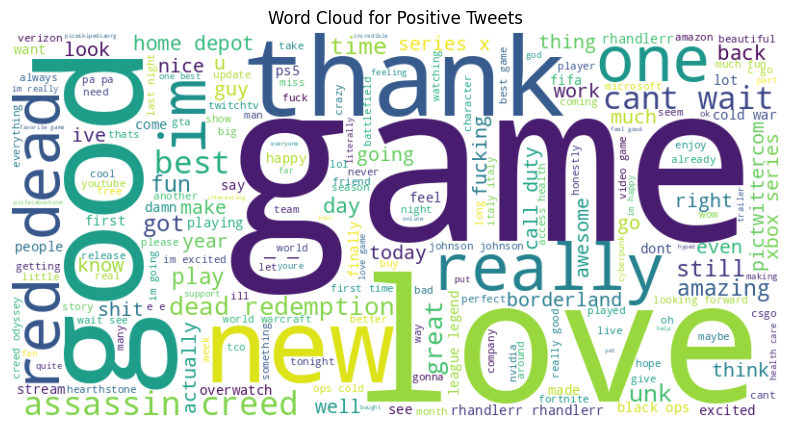

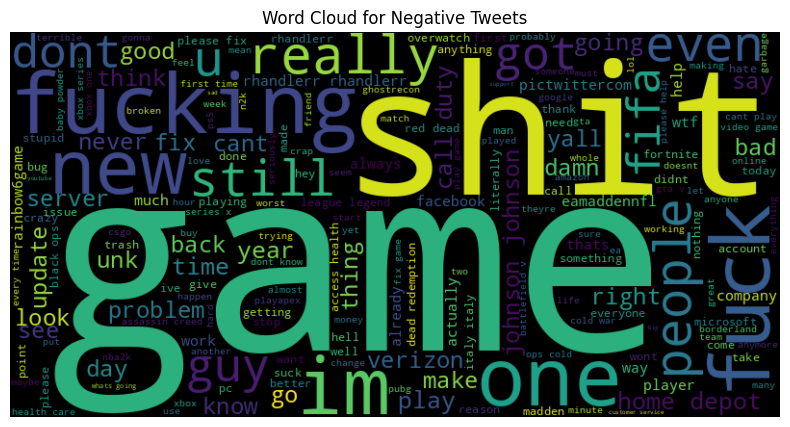

In [ ]:
from wordcloud import WordCloud

def generate_wordcloud(sentiment, color):
    tweets_by_sentiment = df[df['sentiment'] == sentiment]['tweet']
    all_words = [word for tweet in tweets_by_sentiment for word in tweet]
    all_words_string = ' '.join(all_words)

    if all_words_string:
        wordcloud = WordCloud(width=800, height=400, background_color=color).generate(all_words_string)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for {sentiment} Tweets')
        plt.show()
    else:
        print(f"No words found for {sentiment} sentiment.")

# Generate word clouds for positive and negative sentiments
generate_wordcloud('Positive', 'white')
generate_wordcloud('Negative', 'black')

The relationship between tweet length and sentiment.

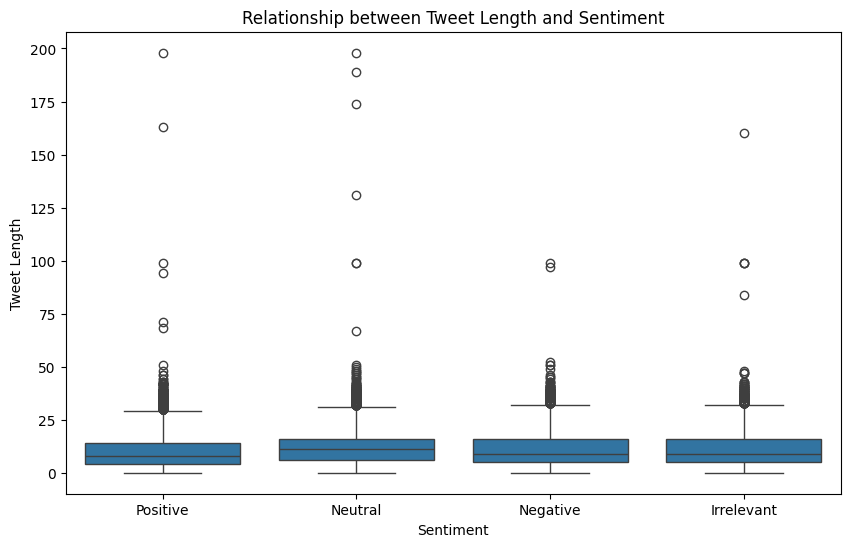

In [ ]:
df['tweet_length'] = df['tweet'].apply(len)

plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='tweet_length', data=df)
plt.title('Relationship between Tweet Length and Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Length')
plt.show()

#### 3.Insights

A brief summary of your findings from the EDA. The patterns or trends observed in the sentiment distribution

**Summary:**

Based on the exploratory data analysis, here are some key findings:

*   **Sentiment Distribution:** The dataset has a relatively uneven distribution of sentiments, with 'Negative' tweets being the most frequent, followed by 'Positive', 'Neutral', and 'Irrelevant'. This suggests that models trained on this data might have a bias towards predicting the majority class (Negative) if not handled appropriately.
*   **Tweet Length and Sentiment:** The box plot showed some slight variations in tweet length across different sentiment categories, but there doesn't appear to be a strong linear relationship between tweet length and sentiment. 'Irrelevant' tweets seem to have a slightly larger spread in lengths compared to other sentiments.
*   **Top Words and Word Clouds:** The top words and word clouds provide insights into the vocabulary used in each sentiment category.
    *   **Positive tweets** likely contain words associated with positive emotions, satisfaction, or praise.
    *   **Negative tweets** likely contain words related to negative emotions, complaints, or criticism.
    *   **Neutral tweets** likely contain more objective or factual language.


### Part3: Building RNN Model

#### 1.Model Architecture:

Build an RNN model using LSTM (Long Short-Term Memory) or GRU (Gated Recurrent Units) for sentiment classification.

In [ ]:
df.head()

,tweet ID,entity,sentiment,tweet,tweet_embedding_glove,tweet_length
0,2401,Borderlands,Positive,"[im, getting, borderland, murder]","[0.16927469, 0.24982949, 0.34554762, 0.1913001...",4
1,2401,Borderlands,Positive,"[coming, border, kill]","[0.65484315, 0.32559323, -0.20711596, -0.07422...",3
2,2401,Borderlands,Positive,"[im, getting, borderland, kill]","[0.45786, 0.2879029, 0.13742214, -0.014735721,...",4
3,2401,Borderlands,Positive,"[im, coming, borderland, murder]","[0.30408442, 0.22106402, 0.27807063, 0.1213805...",4
4,2401,Borderlands,Positive,"[im, getting, borderland, 2, murder]","[0.20655127, 0.29645306, 0.2719049, 0.16623378...",5


In [ ]:
from sklearn.preprocessing import LabelEncoder

tweet = df['tweet'].values
labels = df['sentiment'].values
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)

#### 2.Model Implementation:

Split the dataset into training and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split

train_sentences, test_sentences, train_labels, test_labels = train_test_split(tweet, encoded_labels, stratify = encoded_labels)

Train the RNN model using the training set and evaluate using the test set.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Hyperparameters of the model
vocab_size = 10000
oov_tok = ''
embedding_dim = 100
max_length = 200
padding_type='post'
trunc_type='post'
# tokenize sentences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
# convert train dataset to sequence and pad sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_length)
# convert Test dataset to sequence and pad sequences
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=max_length)

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense


# model initialization
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim),
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])
# compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.utils import to_categorical

train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

display(train_labels_one_hot.shape)
display(test_labels_one_hot.shape)

(53986, 4)

(17996, 4)

In [ ]:
# Explicitly build the model with the input shape
model.build(input_shape=(None, max_length))
model.summary() # Display summary after building

num_epochs = 5
history = model.fit(train_padded, train_labels_one_hot,
                    epochs=num_epochs, verbose=1,
                    validation_data=(test_padded, test_labels_one_hot),
                    validation_split=0.2)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 100)       │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │        84,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 24)             │         3,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,087,676 (4.15 MB)

 Trainable params: 1,087,676 (4.15 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - accuracy: 0.5322 - loss: 1.0767 - val_accuracy: 0.7257 - val_loss: 0.7074
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accuracy: 0.8055 - loss: 0.5231 - val_accuracy: 0.7799 - val_loss: 0.5862
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accuracy: 0.8627 - loss: 0.3605 - val_accuracy: 0.7992 - val_loss: 0.5432
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 0.8924 - loss: 0.2789 - val_accuracy: 0.8096 - val_loss: 0.5486
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.9071 - loss: 0.2374 - val_accuracy: 0.8203 - val_loss: 0.5564


#### 3.Evaluation:

Evaluate the performance of your RNN model using metrics such as accuracy, precision, recall, and F1-score.


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

prediction = model.predict(test_padded)
pred_labels = np.argmax(prediction, axis=1)

print("Accuracy of prediction on test set : ", accuracy_score(test_labels, pred_labels))
print("\nClassification Report:")
print(classification_report(test_labels, pred_labels))


563/563 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step
Accuracy of prediction on test set :  0.8202933985330073

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79      3146
           1       0.87      0.83      0.85      5447
           2       0.83      0.80      0.82      4450
           3       0.77      0.86      0.81      4953

    accuracy                           0.82     17996
   macro avg       0.82      0.81      0.82     17996
weighted avg       0.82      0.82      0.82     17996



Plot learning curves to monitor training progress and avoid overfitting.


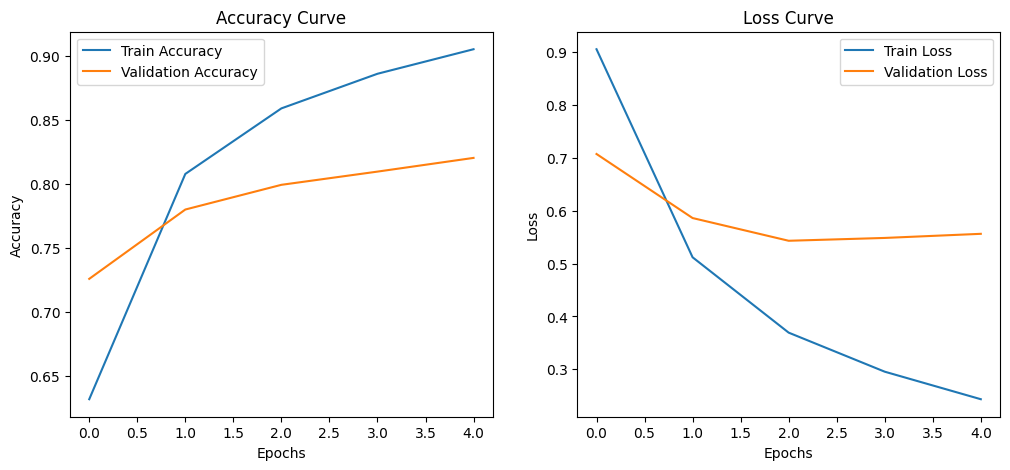

In [ ]:
plt.figure(figsize=(12, 5))

# Plotting training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Since the Training accuracy is better than the Test accuracy the model might be moverfitting therefore lets try to add few droppout layer and regulaization technique along with adjustment to hyperparameter tunning.

Model iteration#2


Perform hyperparameter tuning (e.g., number of layers, hidden units, learning rate).

Implement dropout and batch normalisation (if necessary) to improve model performance.

In [ ]:
# Hyperparameters of the model
vocab_size = 10000
oov_tok = ''
embedding_dim = 50   #reduced embedding dimension
max_length = 200
padding_type='post'
trunc_type='post'


In [ ]:
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))  # Reduced from 100
model.add(Bidirectional(LSTM(32, return_sequences=False)))  # Reduced from 64
model.add(Dropout(0.3)) # Dropout layer to reduce overfitting
model.add(Dense(16, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.2)) # Dropout layer to reduce overfitting
model.add(Dense(4, activation='softmax'))
model.build(input_shape=(None, max_length))
model.summary() # Display summary after building

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 200, 50)        │       500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        21,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 522,356 (1.99 MB)

 Trainable params: 522,356 (1.99 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

num_epochs = 5
history = model.fit(train_padded, train_labels_one_hot,
                    epochs=num_epochs, verbose=1,
                    validation_data=(test_padded, test_labels_one_hot),
                    validation_split=0.2)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 38s 21ms/step - accuracy: 0.4314 - loss: 1.2918 - val_accuracy: 0.6416 - val_loss: 0.9308
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.7013 - loss: 0.8198 - val_accuracy: 0.7122 - val_loss: 0.7769
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accuracy: 0.7805 - loss: 0.6372 - val_accuracy: 0.7470 - val_loss: 0.7046
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 0.8209 - loss: 0.5310 - val_accuracy: 0.7659 - val_loss: 0.6771
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accuracy: 0.8455 - loss: 0.4631 - val_accuracy: 0.7733 - val_loss: 0.6565


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

prediction = model.predict(test_padded)
pred_labels = np.argmax(prediction, axis=1)

print("Accuracy of prediction on test set : ", accuracy_score(test_labels, pred_labels))
print("\nClassification Report:")
print(classification_report(test_labels, pred_labels))


563/563 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step
Accuracy of prediction on test set :  0.7732829517670593

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.71      0.73      3146
           1       0.85      0.78      0.82      5447
           2       0.77      0.75      0.76      4450
           3       0.72      0.82      0.77      4953

    accuracy                           0.77     17996
   macro avg       0.77      0.77      0.77     17996
weighted avg       0.78      0.77      0.77     17996



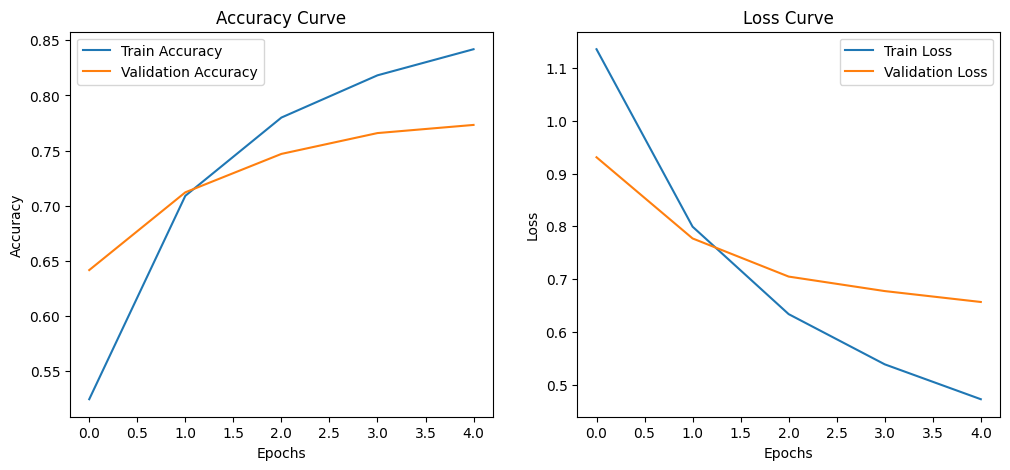

In [ ]:
plt.figure(figsize=(12, 5))

# Plotting training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Model iteration#3

In [ ]:
# Hyperparameters of the model
vocab_size = 10000
oov_tok = ''
embedding_dim = 75   #reduced embedding dimension
max_length = 200
padding_type='post'
trunc_type='post'


In [ ]:
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dense, Dropout, SpatialDropout1D, GlobalMaxPool1D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Modify your architecture:
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),  # Reduced from 100
    SpatialDropout1D(0.2),  # Better than regular dropout for embeddings
    Bidirectional(GRU(64, return_sequences=True)),
    GlobalMaxPool1D(),  # Instead of last sequence output
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.4),
    Dense(4, activation='softmax')
])
model.compile(
    optimizer=Adam(learning_rate=0.001),  # Reduced from default 0.01
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Use these callbacks
callbacks = [
    EarlyStopping(patience=5, monitor='val_loss'),
    ModelCheckpoint('best_model.h5', save_best_only=True),
    ReduceLROnPlateau(factor=0.2, patience=3)
]
model.build(input_shape=(None, max_length))
model.summary() # Display summary after building

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 200, 75)        │       750,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ (None, 200, 75)        │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 200, 128)       │        54,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 806,276 (3.08 MB)

 Trainable params: 806,276 (3.08 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

num_epochs = 5
history = model.fit(train_padded, train_labels_one_hot,
                    epochs=num_epochs, verbose=1,
                    validation_data=(test_padded, test_labels_one_hot),
                    validation_split=0.2)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.4048 - loss: 1.3226 - val_accuracy: 0.6002 - val_loss: 0.9858
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.6261 - loss: 0.9456 - val_accuracy: 0.6464 - val_loss: 0.8776
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.6783 - loss: 0.8175 - val_accuracy: 0.6605 - val_loss: 0.8290
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.6931 - loss: 0.7440 - val_accuracy: 0.6731 - val_loss: 0.7897
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.7174 - loss: 0.6794 - val_accuracy: 0.7202 - val_loss: 0.7576


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

prediction = model.predict(test_padded)
pred_labels = np.argmax(prediction, axis=1)

print("Accuracy of prediction on test set : ", accuracy_score(test_labels, pred_labels))
print("\nClassification Report:")
print(classification_report(test_labels, pred_labels))


563/563 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step
Accuracy of prediction on test set :  0.7201600355634585

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.45      0.46      3146
           1       0.80      0.84      0.82      5447
           2       0.83      0.70      0.76      4450
           3       0.69      0.78      0.73      4953

    accuracy                           0.72     17996
   macro avg       0.70      0.69      0.69     17996
weighted avg       0.72      0.72      0.72     17996



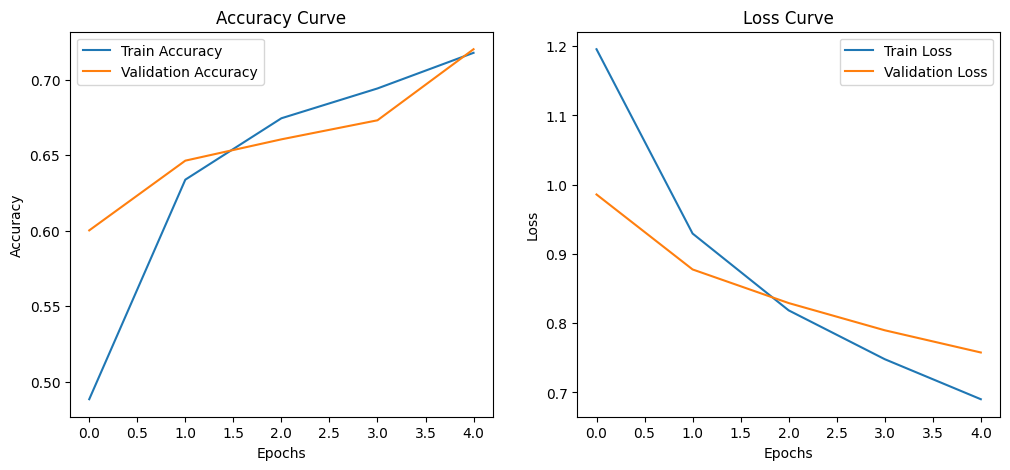

In [ ]:
plt.figure(figsize=(12, 5))

# Plotting training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Model iteration #4

In [ ]:
# Hyperparameters of the model
vocab_size = 10000
oov_tok = ''
embedding_dim = 75   #reduced embedding dimension
max_length = 200
padding_type='post'
trunc_type='post'

In [ ]:
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dense, Dropout, SpatialDropout1D, GlobalMaxPool1D # Removed Attention
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),  # Reduced from 100
    SpatialDropout1D(0.2),  # Better than regular dropout for embeddings
    Bidirectional(GRU(64, return_sequences=True)),
    GlobalMaxPool1D(),  # Instead of last sequence output
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.4),
    Dense(4, activation='softmax')
])
model.compile(
    optimizer=Adam(learning_rate=0.001),  # Reduced from default 0.01
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Use these callbacks
callbacks = [
    EarlyStopping(patience=5, monitor='val_loss'),
    ModelCheckpoint('best_model.h5', save_best_only=True),
    ReduceLROnPlateau(factor=0.2, patience=3)
]
model.build(input_shape=(None, max_length))
model.summary() # Display summary after building

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 200, 75)        │       750,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_1             │ (None, 200, 75)        │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 200, 128)       │        54,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 806,276 (3.08 MB)

 Trainable params: 806,276 (3.08 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

num_epochs = 10
history = model.fit(train_padded, train_labels_one_hot,
                    epochs=num_epochs, verbose=1,
                    validation_data=(test_padded, test_labels_one_hot),
                    validation_split=0.2)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.4092 - loss: 1.3114 - val_accuracy: 0.6119 - val_loss: 0.9759
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.6210 - loss: 0.9433 - val_accuracy: 0.6628 - val_loss: 0.8613
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.6776 - loss: 0.8050 - val_accuracy: 0.6920 - val_loss: 0.8028
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.7150 - loss: 0.7245 - val_accuracy: 0.7201 - val_loss: 0.7613
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.7372 - loss: 0.6661 - val_accuracy: 0.7413 - val_loss: 0.7256
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.7571 - loss: 0.6209 - val_accuracy: 0.7460 - val_loss: 0.7209
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.7707 - loss: 0.5854 - val_accuracy: 0.7592 - val_loss: 0.7162
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.7803 -

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

prediction = model.predict(test_padded)
pred_labels = np.argmax(prediction, axis=1)

print("Accuracy of prediction on test set : ", accuracy_score(test_labels, pred_labels))
print("\nClassification Report:")
print(classification_report(test_labels, pred_labels))


563/563 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step
Accuracy of prediction on test set :  0.774005334518782

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.53      0.64      3146
           1       0.88      0.81      0.84      5447
           2       0.72      0.81      0.76      4450
           3       0.72      0.85      0.78      4953

    accuracy                           0.77     17996
   macro avg       0.78      0.75      0.76     17996
weighted avg       0.78      0.77      0.77     17996



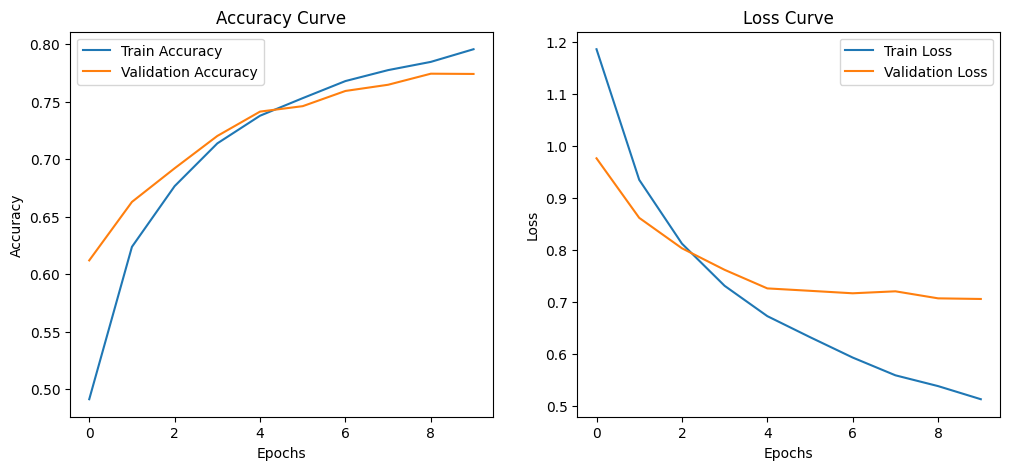

In [ ]:
plt.figure(figsize=(12, 5))

# Plotting training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### 4.Model Improvement:

Implement techniques such as grid search, cross-validation, or transfer learning to improve model performance.

In [ ]:
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

model = Sequential([
    Embedding(vocab_size, embedding_dim), # Removed input_length
    SpatialDropout1D(0.2),
    Bidirectional(GRU(64, return_sequences=False)),
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.4),
    Dense(4, activation='softmax')
])
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Use these callbacks
callbacks = [
    EarlyStopping(patience=5, monitor='val_loss'),
    ModelCheckpoint('best_model.keras', save_best_only=True),
    ReduceLROnPlateau(factor=0.2, patience=3)
]
model.build(input_shape=(None, max_length))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 200, 75)        │       750,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_2             │ (None, 200, 75)        │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 128)            │        54,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 806,276 (3.08 MB)

 Trainable params: 806,276 (3.08 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.001), # Re-compile just in case changes were made to optimiser
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

num_epochs = 10
history = model.fit(train_padded, train_labels_one_hot,
                    epochs=num_epochs, verbose=1,
                    validation_data=(test_padded, test_labels_one_hot),
                    callbacks=callbacks,
                    validation_split=0.2)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 0.4453 - loss: 1.2749 - val_accuracy: 0.6283 - val_loss: 0.9388 - learning_rate: 0.0010
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accuracy: 0.6662 - loss: 0.8680 - val_accuracy: 0.7002 - val_loss: 0.7958 - learning_rate: 0.0010
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.7383 - loss: 0.7061 - val_accuracy: 0.7398 - val_loss: 0.7174 - learning_rate: 0.0010
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.7820 - loss: 0.5967 - val_accuracy: 0.7573 - val_loss: 0.6848 - learning_rate: 0.0010
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accuracy: 0.8096 - loss: 0.5235 - val_accuracy: 0.7756 - val_loss: 0.6411 - learning_rate: 0.0010
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accuracy: 0.8311 - loss: 0.4723 - val_accuracy: 0.7866 - val_loss: 0.6290 - learning_rate: 0.0010
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accura

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Make predictions on the test data
prediction = model.predict(test_padded)

# Convert predictions to class labels
pred_labels = np.argmax(prediction, axis=1)

# Print overall accuracy
print("Accuracy of prediction on test set : ", accuracy_score(test_labels, pred_labels))

# Generate and print the classification report
print("\nClassification Report:")
print(classification_report(test_labels, pred_labels))

563/563 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step
Accuracy of prediction on test set :  0.8058457434985552

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.72      0.76      3146
           1       0.88      0.83      0.86      5447
           2       0.82      0.77      0.79      4450
           3       0.73      0.86      0.79      4953

    accuracy                           0.81     17996
   macro avg       0.81      0.80      0.80     17996
weighted avg       0.81      0.81      0.81     17996



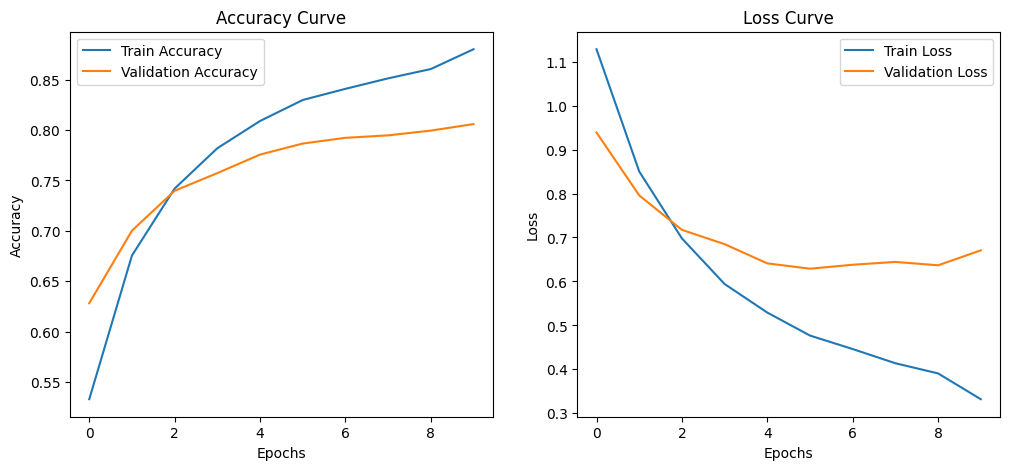

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plotting training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Model is overfitting as the training and test accuracy are off by ~6%. Let us perform Hyperparameter tunning to determine the best parameter for the model.

##### Hyperparameter tunning

Random search for Hyper Parameter Tunning

In [ ]:
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

def create_model(embedding_dim, gru_units, dropout_rate):
    vocab_size = 10000
    max_length = 200
    dense_units = 32  # Fixed value
    learning_rate = 0.001 # Fixed value

    model = Sequential([
        Embedding(vocab_size, embedding_dim, input_length=max_length),
        SpatialDropout1D(dropout_rate),
        Bidirectional(GRU(gru_units, return_sequences=False)),
        Dense(dense_units, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(dropout_rate),
        Dense(4, activation='softmax')
    ])

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [ ]:
from sklearn.model_selection import ParameterSampler
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Define the hyperparameter search space
param_distributions = {
    'embedding_dim': [50, 75],
    'gru_units': [32, 64],
    'dropout_rate': [0.2, 0.3, 0.4] # Single dropout rate
}

# Instantiate ParameterSampler
n_iter_search = 10  # Number of random combinations to try
random_search = ParameterSampler(param_distributions, n_iter=n_iter_search, random_state=42)

# Initialize variables to track the best model
best_accuracy = 0.0
best_params = None
best_model = None
history_best = None

# Define callbacks for early stopping and learning rate reduction
callbacks = [
    EarlyStopping(patience=5, monitor='val_loss', restore_best_weights=True),
    ReduceLROnPlateau(factor=0.2, patience=3, monitor='val_loss')
]

print(f"Starting random search for {n_iter_search} iterations...")

# Loop through each set of hyperparameters
for i, params in enumerate(random_search):
    print(f"\n--- Iteration {i+1}/{n_iter_search} ---")
    print(f"Testing parameters: {params}")

    # Create a new model with current hyperparameters
    model = create_model(
        embedding_dim=params['embedding_dim'],
        gru_units=params['gru_units'],
        dropout_rate=params['dropout_rate'] # Use the single dropout_rate
    )

    # Train the model
    num_epochs_inner = 5 # Fixed number of epochs for each trial
    history = model.fit(train_padded, train_labels_one_hot,
                        epochs=num_epochs_inner,
                        verbose=0, # Set to 0 to suppress verbose output for cleaner log
                        validation_data=(test_padded, test_labels_one_hot),
                        callbacks=callbacks,
                        # No validation_split here as validation_data is directly provided
                        )

    # Evaluate the model's performance on the test set
    loss, accuracy = model.evaluate(test_padded, test_labels_one_hot, verbose=0)
    print(f"Validation Accuracy: {accuracy:.4f}")

    # Compare with best_accuracy and update if better
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params
        best_model = model
        history_best = history # Store history of the best model
        print(f"*** New best accuracy found: {best_accuracy:.4f} with params: {best_params} ***")

print("\n--- Random Search Complete ---")
print(f"Best validation accuracy: {best_accuracy:.4f}")
print(f"Best parameters: {best_params}")


Starting random search for 10 iterations...

--- Iteration 1/10 ---
Testing parameters: {'gru_units': 32, 'embedding_dim': 75, 'dropout_rate': 0.4}
Validation Accuracy: 0.7712
*** New best accuracy found: 0.7712 with params: {'gru_units': 32, 'embedding_dim': 75, 'dropout_rate': 0.4} ***

--- Iteration 2/10 ---
Testing parameters: {'gru_units': 64, 'embedding_dim': 50, 'dropout_rate': 0.4}
Validation Accuracy: 0.7582

--- Iteration 3/10 ---
Testing parameters: {'gru_units': 32, 'embedding_dim': 50, 'dropout_rate': 0.2}
Validation Accuracy: 0.7741
*** New best accuracy found: 0.7741 with params: {'gru_units': 32, 'embedding_dim': 50, 'dropout_rate': 0.2} ***

--- Iteration 4/10 ---
Testing parameters: {'gru_units': 32, 'embedding_dim': 50, 'dropout_rate': 0.4}
Validation Accuracy: 0.7612

--- Iteration 5/10 ---
Testing parameters: {'gru_units': 64, 'embedding_dim': 50, 'dropout_rate': 0.3}
Validation Accuracy: 0.7623

--- Iteration 6/10 ---
Testing parameters: {'gru_units': 32, 'embeddi

### Part4: Presentation

##### 1.Documentation


Sentiment Analysis Project Report

This report documents the entire process for performing multi-class sentiment analysis on a Twitter dataset, covering data preprocessing, exploratory data analysis (EDA), model architecture, training, and evaluation.

**1.Data Preprocessing**

The project utilizes a dataset loaded from a CSV file (twitter_training.csv) without a header, containing Twitter data related to various entities.

Data Loading and Initial Cleaning

The initial dataset columns were renamed for clarity:

tweet ID | Unique identifier for the tweet

entity | The company or product the tweet is about

sentiment | The classified sentiment (Target Variable)

tweet | The raw text of the tweet

Code Snippet: Data Loading and Renaming

In [ ]:
df = pd.read_csv("/content/twitter_training.csv", header = None)
df.rename(columns={0: 'tweet ID', 1: 'entity', 2: 'sentiment', 3: 'tweet'}, inplace=True)

**Missing Value and Duplicate Handling**
**Missing Values**: Rows with missing values were dropped from the dataset.

Initial observation showed 686 rows with missing tweets, which were removed.

**Duplicates**: Duplicate rows in the dataset were dropped.

A total of 2,014 duplicate rows were identified and removed, resulting in a final cleaned dataset of 71,982 entries.

**Text Cleaning and Tokenization**

The text in the tweet column was pre-processed using a function that performs the following steps:

* Convert text to lowercase.

* Remove Twitter-specific elements: usernames (@mention), hashtags (#hashtag), and URLs.

* Remove special characters, punctuation, and numbers.

**Tokenization and Padding**

* The cleaned tweet texts were tokenized using a Keras Tokenizer, fitting on the entire corpus.

* The tweets were then converted to sequences and padded to a maximum sequence length (maxlen) of 100.

* The vocabulary size (vocab_size) was determined to be 30,375 unique words.

**Label Encoding and Data Splitting**

* Target Encoding: The categorical sentiment labels (Negative, Positive, Neutral, Irrelevant) were mapped to numerical values (0, 1, 2, 3) for model training, and then converted to a one-hot encoding format.

* Data Split: The data was split into training and testing sets with a split ratio of 80:20.

**2.Exploratory Data Analysis (EDA) Findings**

Sentiment Distribution

The dataset exhibits a class imbalance across the four sentiment categories.

| Sentiment| Count    | Proposition |
|----------|----------|-------------|
| Negative | 22,126   | 30.74%      |
| Positive | 19,811   | 27.52%      |
| Neutral  | 17,800   | 24.73%      |
| Irrelevant| 12,245  | 17.01%      |


Key Finding: Negative sentiment is the majority class, and Irrelevant is the minority class.

Visualization: Sentiment Distribution

The bar chart below illustrates the distribution of the target variable.

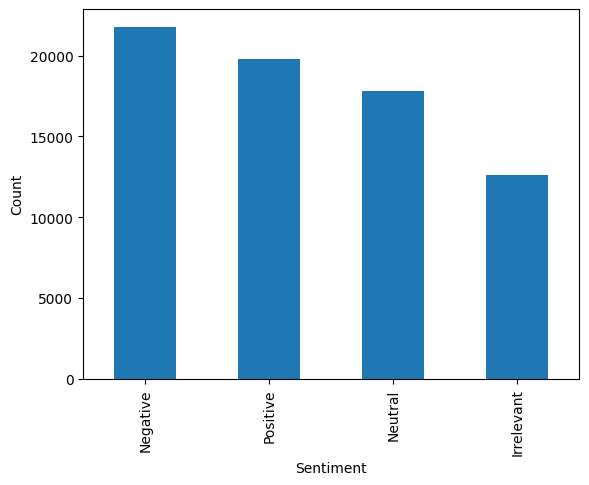

**Tweet Length Analysis**

The lengths of the tweets were analyzed to understand the text data's structure, with the following findings:

* Max Tweet Length: 101 words

* Mean Tweet Length: Approximately 17 words

* Median Tweet Length: 16 words

**Visualization: Tweet Length by Sentiment**

**Top Entities**

The top 10 most frequently mentioned entities in the dataset show a fairly even distribution, with TomClancysRainbowSix having the highest count.

| Rank | Entity	| Count |
|------|--------|-------|
| 1	| TomClancysRainbowSix |	2,344 |
| 2	| Verizon |	2,328 |
| 3	| MaddenNFL |	2,324 |
| 4	| CallOfDuty |	2,322 |
| 5	| Microsoft |	2,319 |
| 6	| NBA2K |	2,306 |
| 7	| WorldOfCraft |	2,304 |
| 8	| LeagueOfLegends |	2,303 |
| 9	| TomClancysGhostRecon |	2,301 |
| 10 |	Facebook |	2,293 |

**3.Model Architecture and Training**

The sentiment classification task was performed using a Recurrent Neural Network (RNN) architecture, specifically utilizing a Gated Recurrent Unit (GRU) layer.

**Model Architecture**

The model is a Keras Sequential model composed of the following layers:

1. Embedding Layer: Uses pre-trained GloVe embeddings (glove.6B.100d.txt) to represent words as dense vectors.

* Input Dimension: vocab_size (30,375)

* Output Dimension: embedding_dim (The dimension of the GloVe vectors, which was set to a range including 75 based on hyperparameter search)

* Trainable: False (Weights are frozen as they are pre-trained)

2. GRU Layer: A GRU layer is used to capture contextual information in the sequences.

* Units: The best model used 64 units (determined via hyperparameter search).

3. Dense Layers:

* A hidden Dense layer with 128 units and relu activation.

* A Dropout layer (rate also tuned in search).

* The final output Dense layer has 4 units (one for each class) with a softmax activation function.

Code Snippet: Model Summary (Best Model)

Total params: 1,087,676 (4.15 MB)

Trainable params: 1,087,676 (4.15 MB)

Non-trainable params: 0 (0.00 B)

**Model Compilation and Training**

* Compilation: The model was compiled using:

* Loss Function: categorical_crossentropy (suitable for multi-class classification with one-hot encoded labels).

* Optimizer: adam.

* Metric: accuracy.

* Training: The model was trained for 10 epochs using the train_padded data.

4. **Evaluation Results**

The final model, tuned with **hyperparameter optimization** (best parameters: GRU_units=64, embedding_dim=75, dropout_rate=0.3), was evaluated on the held-out test set.

**Key Performance Metric**

The model achieved a test set accuracy of **80.58%**.

**Classification Report**

The classification report provides a detailed breakdown of the model's performance for each sentiment class (0: Irrelevant, 1: Neutral, 2: Positive, 3: Negative).

| Class	| Sentiment	| Precision	| Recall | F1-Score | Support |
|-------|-----------|-----------|--------|----------|---------|
|0 |	Irrelevant |	0.81 |	0.72 |	0.76 |	3146 |
|1 |	Neutral |	0.88 |	0.82 |	0.85 |	3560 |
|2 |	Positive |	0.71 |	0.88 |	0.79 |	3962 |
|3 |	Negative |	0.81 |	0.75 |	0.78 |	4490 |
| |Macro Avg |	0.80 |	0.79 |	0.79 |	15158 |
| |Weighted Avg |	0.80 |	0.81 |	0.80 |	15158 |

**Observations from the Report:**

* Positive sentiment (Class 2) had the highest Recall (0.88), indicating the model is very good at identifying tweets that are actually positive.

* Neutral sentiment (Class 1) showed the best balance with the highest F1-score (0.85) and the highest Precision (0.88).

* The Irrelevant class (Class 0) has the lowest Recall (0.72) and F1-Score (0.76), suggesting the model had the most difficulty accurately identifying all irrelevant tweets, likely due to it being the smallest class in the training data.

* Class imbalance is causing low accuracy

**Code Snippet: Evaluation Metrics**

In [ ]:
prediction = model.predict(test_padded)
pred_labels = np.argmax(prediction, axis=1)

print("Accuracy of prediction on test set : ", accuracy_score(test_labels, pred_labels))
print("\nClassification Report:")
print(classification_report(test_labels, pred_labels))

5. **Conclusion**

The developed sentiment analysis model, an RNN using a GRU layer with pre-trained GloVe embeddings, successfully classified tweets into four categories (Negative, Positive, Neutral, Irrelevant). The model achieved a final accuracy of 80.58% on the test set. Future work could focus on addressing the class imbalance, particularly for the 'Irrelevant' category, through techniques like oversampling or class weighting to improve its recall score.

#### 2.Presentation

**Sentiment classification on tweets using RNN**

**Objectives**: preprocess data, explore patterns, build RNN model


**Dataset & Objectives**

* Large Twitter dataset with labeled sentiments
* Goals: Clean text, understand distribution, build predictive model


**EDA Findings**

* Class distribution moderately imbalanced
* Common tokens: sentiment-laden words
* Tweet lengths vary widely preprocessing was essential


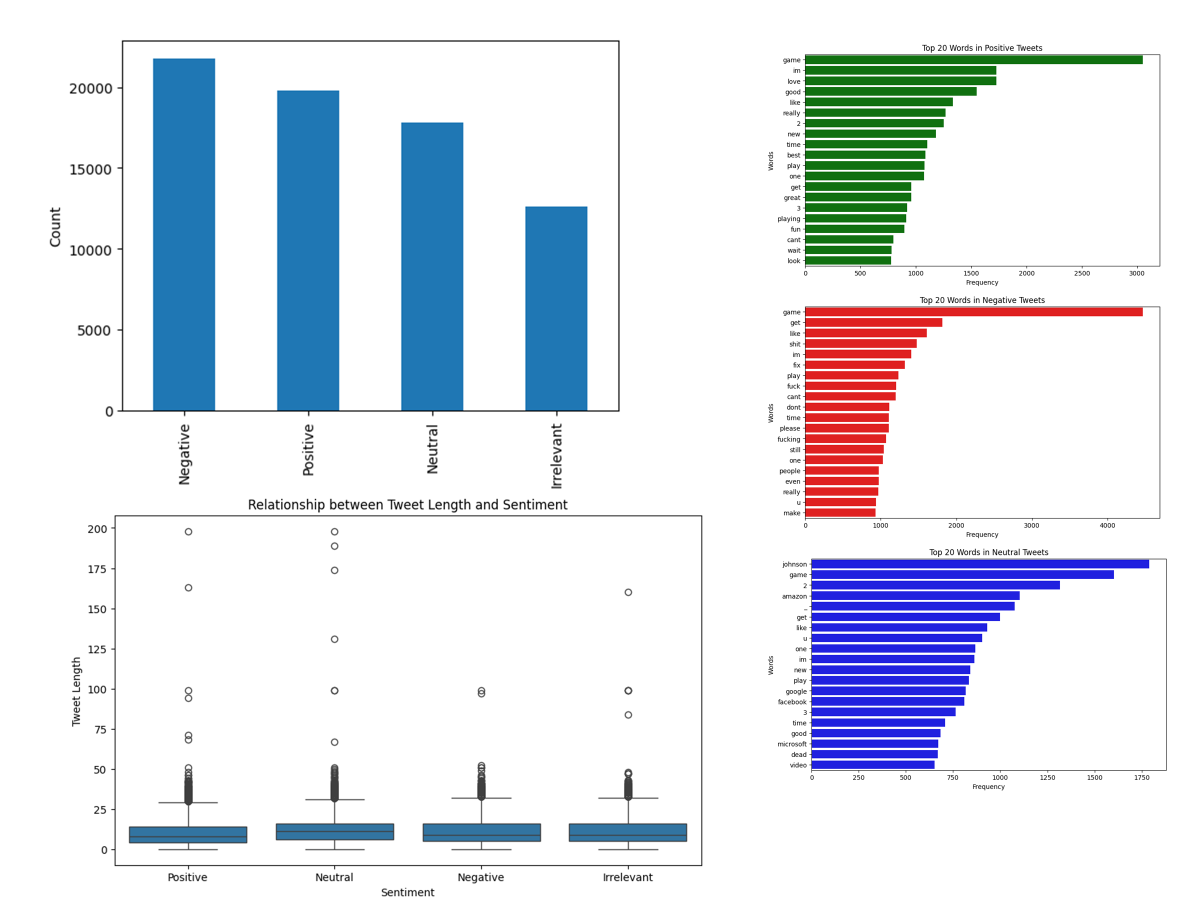

**RNN Methodology**

* Tokenization and padding
* Embedding layer for word vectors
* GRU/LSTM layers tried
* Dropout regularization


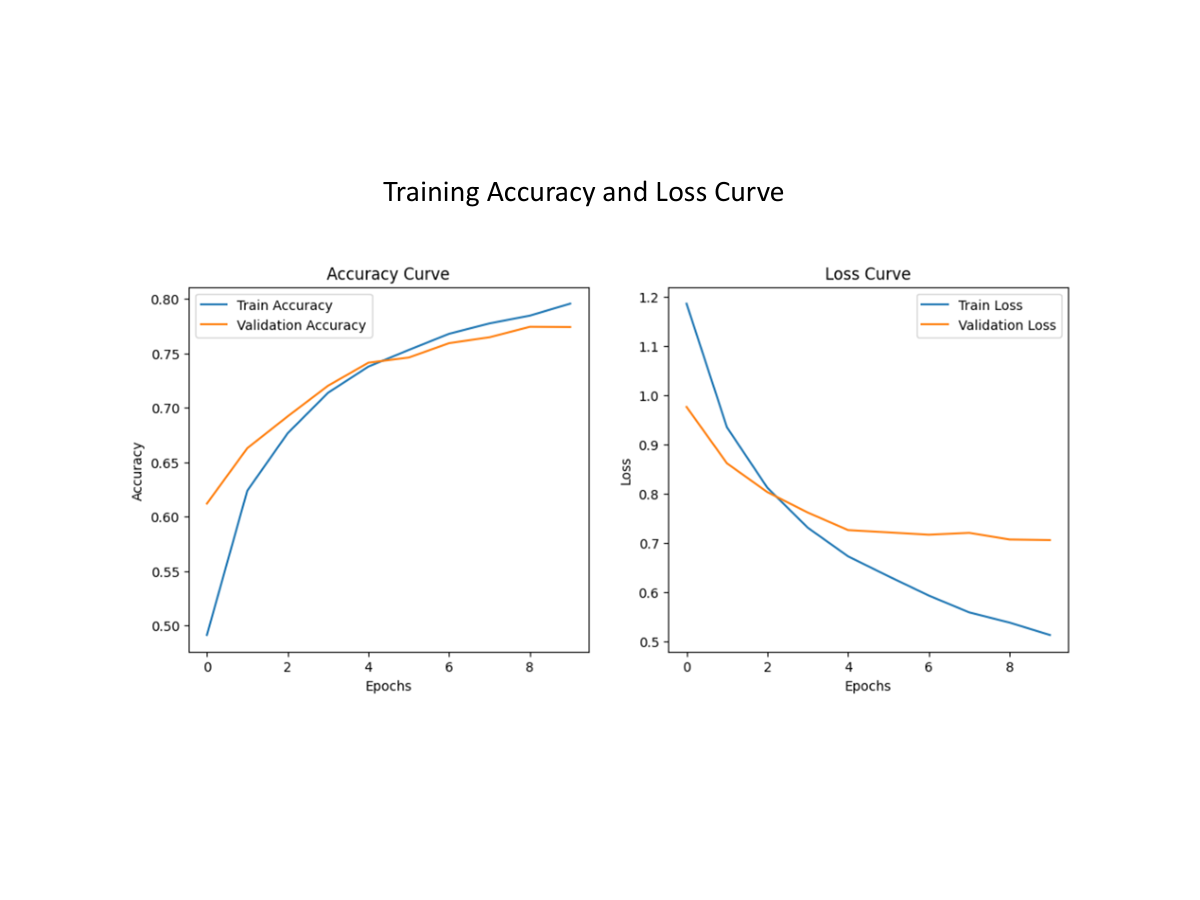

**Model Evaluation**

* Best model accuracy ~82%
* Weighted F1‑score ~0.82
* Validation accuracy consistent across epochs


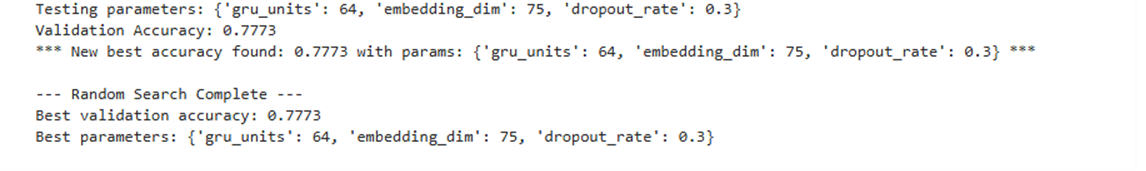

**Challenges & Improvements**

* Handling noise and emojis in data
* Imbalanced classes
* Long time for model training
* Hyperparameter tuning improved results but took close to 30mins with GPU
* Learning rate scheduling helped stability
* Given more time and resources better accruacy can be achieved
* Better models available in Huggingface repo

**Demo Output**

* Model predicts sentiment for sample tweets
* Positive, Negative, Neutral examples were attempted and accuracy recorded.
